# p Chart Maker Template
by Nathan Whitehead

original code source: https://towardsdatascience.com/quality-control-charts-guide-for-python-9bb1c859c051

In [37]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics as st

# import data
x=pd.read_csv('q3data.csv') #import your data here
x=np.array(x)


#set sample size
n=100       
# Define list variable for groups means, ranges, and stanrdard deviations
p_hat=[]

# Get and append groups means, ranges, and standard deviations
for group in x:
    p_hat.append(group[1]/n)

#initializing all variables to simplify future code
p_bar = st.mean(p_hat)
pUCL = p_bar+3*(np.sqrt((p_bar*(1-p_bar))/ n))
pLCL = p_bar-3*(np.sqrt((p_bar*(1-p_bar))/ n))


# Output Centerline and Control Limits

In [38]:

print("-----P chart-----")
print("p-bar:",p_bar)    
print("UCL:",pUCL)
print("LCL:",pLCL)

-----P chart-----
p-bar: 0.05368421052631579
UCL: 0.12130225135850332
LCL: -0.013933830305871739


# Plot Control Chart

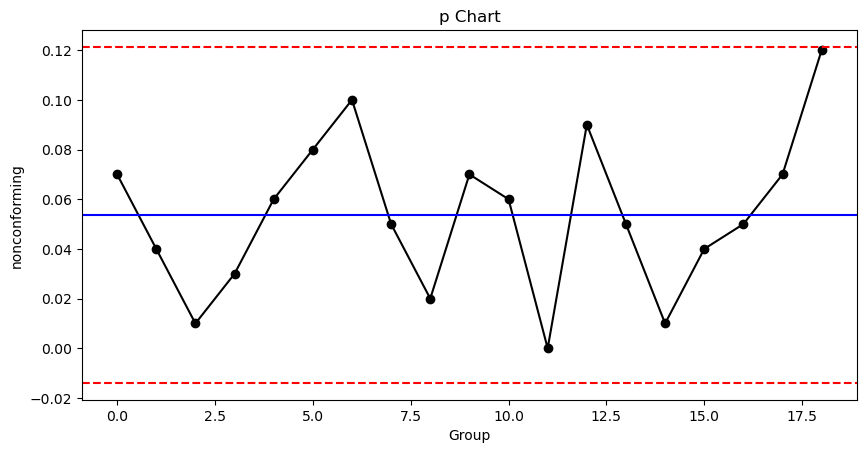

In [39]:
# Plot p chart
fig, axs = plt.subplots()

# x-bar chart
axs.plot(p_hat, linestyle='-', marker='o', color='black')
axs.axhline(pUCL, color='red', linestyle='dashed')
axs.axhline(pLCL, color='red', linestyle='dashed')
axs.axhline(p_bar, color='blue')
axs.set_title('p Chart')
axs.set(xlabel='Group', ylabel='nonconforming')
fig.set_figwidth(10)

# Check for out of control points

In [40]:

# Validate points out of control limits for R chart
i = 0
control = True
for group in p_hat:
    if group > pUCL or group < pLCL:
        print('Group', i, 'out of range cotrol limits!')
        control = False
    i += 1
if control == True:
    print('p chart: All points within control limits.')
    


p chart: All points within control limits.
